In [5]:
%pylab inline
import numpy as np
from numpy.polynomial.polynomial import Polynomial

Populating the interactive namespace from numpy and matplotlib


# Intro to FEM

Finite Elements Method is the 'Art' of projecting an operator in the most suitable space. 

### Projection: from Plane Geometry to Functional Analysis

Projecting a two dimentional vector $\mathbf{u} = (u_x, u_y)$ on the canonical basis $\{\mathbf{e}_x = (1,0), \mathbf{e}_y = (0,1)\}$, roughly speacking the $x$ and $y$ axes, is a weel known operation:

$$
\mathbf{u} = u_x \cdot \mathbf{e}_x + u_y \cdot \mathbf{e}_y.
$$

If $u$ is a function defined on a domain $\Omega$ (and not a vector anymore) the $+$ sign is substituted by the integral over all the domain $\int_\Omega$. 

The canonical basis $\{\mathbf{e}_x, \mathbf{e}_y\}$ is substituted by another set $V$ wich is very similar to our canonincal basis, but has the very convenient chracteristic of being infinite:

$$
V = \{v_0, v_1, v_2, ..., v_\infty\}
$$

Now let's gradually move form the geometrical progection to the functional analysis projection. In plain geometry we sum all the $\mathbf{u}$ coponents, multiplied for all the basis vectors defining my space:


$$
u_x \cdot \mathbf{e}_x + u_y \cdot \mathbf{e}_y.
$$

Now we need only to substitute the word 'sum', with the $\int_\Omega$, and mathe matically write 'for all the basis functions in the space that I choose' ($\forall v \in V$), and we obtain the expression:

$$
\int_\Omega u\cdot v \quad \forall v \in V
$$

That's it. There are a lot theorems and elegant mathemathis in between these two expressions, but the ground foundations are not much more complicated than this.



## Computational Mechanics

A simple mathematical tool like 'projection' can be effectively applied to computational mechanics. Mechanical phenomenca can be described by partial differential equations, and the resulting expressions can be very nasty. Let's bring up a couple of examples, called **strong formulations**.

- Heat Equation, $u$ is the temperature $f$ is the heat source

$$
\Delta u = \partial_{xx} u + \partial_{yy} u= f 
$$

- Linear Elasticity $\mathbf{u}$ is the displacement, $\mathbf{F}$ are the external forces.

$$
\nabla \cdot \left(C:\left(\frac{1}{2}\left(\nabla \mathbf{u}+\nabla \mathbf{u}^T\right)\right)\right) = \mathbf{F}
$$

It is clear that these operats look and, most of the times, are nasty. It is thanks to Galerkin's (and many otherthers') intuition that sounded like a good idea to _project_ *operators*, onto *functions spaces*. In this way we can have a more *flexible* expression, called **weak formulation**:

- Heat Equation

$$
\Delta u = f \rightarrow \quad \int_\Omega \Delta u\cdot v = \int_\Omega f\cdot v \rightarrow \quad  \int_\Omega \nabla u\cdot \nabla v = \int_\Omega f\cdot v\quad  \forall v \in V
$$

- Linear Elasticity

$$
\mu \int_\Omega\mathbf{D}\mathbf{u}:\mathbf{D}\mathbf{v} + 
\lambda \int_\Omega\nabla\cdot\mathbf{u}\, \nabla\cdot\mathbf{v} =
\int_\Omega \mathbf{F}\quad \forall v \in V
$$

## Reference Element

In [9]:
degree = 2
dofs = np.linspace(0,1,degree+1)
print dofs

[ 0.   0.5  1. ]


```
element     |-----|
1st degree  o-----o
2nd degree  o--o--o
3rd degree  o-o-o-o
```

In [10]:
L = [Polynomial.fromroots([xj for xj in dofs if xj != dofs[i]]) for i in range(degree+1)]
L = [L[i]/L[i](dofs[i]) for i in range(degree+1)]

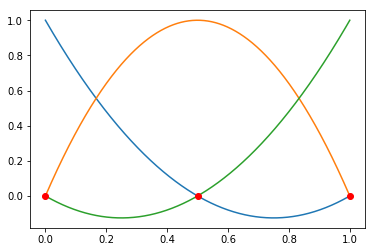

In [11]:
xi = linspace(0,1,1025)
for f in L:
    plot(xi, f(xi))
plot(dofs, 0*dofs, 'ro')